In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.

lats=np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs=np.random.uniform(low=-180.000, high=180.00, size=1500)

lat_lngs=zip(lats,lngs)

lat_lngs

In [3]:
#Addlatitudes and longitudes to a list.

coordinates=list(lat_lngs)

In [4]:
#Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-25.397402561011873 -115.27404440803855
-34.03116865889575 -170.74500711722857
-81.63975297435093 173.0694329596438
-74.8012099458661 -173.42649975210188
-64.70291466807048 -71.20690116501582
-80.395622714281 -41.388177564171514
11.038199394584836 -152.6473181657148
85.38821041801032 -62.27004138350286
79.27802503663733 -114.98978311738918
22.585056118620074 -162.37190443566305
-58.48732602773042 -167.84017642516622
-31.970544681344755 68.31041723215924
38.887696831209894 -17.13900776888579
-85.5524896760673 -24.049511704006136
-44.96140003048656 -22.435272526167324
29.354170262011067 -71.88012637840134
27.995862180218325 16.8860309021519
-62.373602466097935 37.5931703681282
-12.377951052626457 31.545787045939363
57.210434749107435 -5.709808835007493
-69.22686208007049 109.2532780456832
-20.708305902493265 154.56155456584668
-87.92262544849308 -152.1341801628003
41.3751052919109 -28.543926446342624
-23.678793008530405 -133.7115118941818
54.58103348410532 -126.11191523604715
-60.3599639

47.05735831911525 99.18143512255898
-11.573416572082891 -157.63758484332223
40.542507688214755 -3.997695454363395
-37.24399308499128 -16.31494322162365
-56.039535460188304 -145.164044435353
-49.91913595548021 -121.52301274406489
44.97875549772613 -130.29302130020295
72.06437021436949 112.78914515094294
-71.9707917982615 113.51928697581053
46.09559103713093 -148.52550612961886
-39.30965207761983 -69.24523649097233
-87.16289511703273 145.12489037053558
45.21358680392166 -138.26919398730305
-60.04479920234786 -83.0432574841123
45.23738003334961 93.23934648837121
33.64082655931098 116.04400272575225
-73.5209831307097 173.42467446390123
52.76300665557497 -36.47219833531386
-8.959054275081442 20.192028720663245
-84.79552905052644 76.18426363502311
-89.63140487483666 -21.552728579721588
60.673260755490105 61.63102956639352
47.50255066535391 44.85298804674642
-35.653406557589854 93.58797570801147
-28.595074762347416 144.77914700917944
-77.81516113473239 72.67311466097883
37.683601623374685 -11

In [5]:
from citipy import citipy

In [6]:
#Create a list for holding the cities.

cities=[]

#Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, them we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
#Print the city count to confirm sufficient count.

len(cities)

604

In [7]:
#Import the time library and the datetime module from the datetime library

import time

from datetime import datetime

In [8]:
import requests

from config import weather_api_key

url="https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key

print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c9dbcf9ce214f4562b9ee232d17be3e6


In [9]:
#Create an empty list to hold the weather data.

city_data = []

#Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")


#Create counters.

record_count=1

set_count=1

#Loop thrrough allthe cities in our list.

for i, city in enumerate(cities): 
    
    #Group cities in seats of 50 for logging purposes.
    
    if (i % 50==0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        
     #Create endpoint URL with each city.
        
    city_url=url + "&q=" + city.replace(" ", "+")
    
    
    #log th Url, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    
    record_count +=1
    
 #Run an API request for each of the cities.

    try:
        
        #Parse the JSON and retrieve data.
        
        city_weather=requests.get(city_url).json()
        
        #Parse out the needed data.
        
        city_lat=city_weather["coord"]["lat"]
        
        city_lng=city_weather["coord"]["lon"]
        
        city_max_temp=city_weather["main"]["temp_max"]
        
        city_humidity=city_weather["main"]["humidity"]
        
        city_clouds=city_weather["clouds"]["all"]
       
        city_wind=city_weather["wind"]["speed"]
        
        city_country=city_weather["sys"]["country"]
        
        #Convert the date to ISO standard.
        
        city_date=datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        #Append the city information into city_data list.
        
        city_data.append({"City":city.title(), "Lat":city_lat, "Lng":city_lng, "Max Temp":city_max_temp, "Humidity":city_humidity, "Cloudiness":city_clouds, "Wind Speed":city_wind, "Country":city_country, "Date":city_date})
        
        
        #If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping ...")
        
        pass
    
#Indicate that Data Loading is complete.

print("--------------------------------")

print("Data Retrieval Complete         ")

print("--------------------------------")
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | camacha
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | marsh harbour
Processing Record 13 of Set 1 | waddan
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | mpika
Processing Record 16 of Set 1 | kyle of lochalsh
City not found. Skipping ...
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | yeppoon
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | lagoa
Processing Record 21 of Set 1 | burns lake
Processing Record 22 of Set 1 | avarua
Processing Record 23 

Processing Record 38 of Set 4 | wattegama
Processing Record 39 of Set 4 | coahuayana
Processing Record 40 of Set 4 | avera
Processing Record 41 of Set 4 | hun
Processing Record 42 of Set 4 | korla
Processing Record 43 of Set 4 | northam
Processing Record 44 of Set 4 | murakami
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | abu samrah
Processing Record 47 of Set 4 | umm jarr
City not found. Skipping ...
Processing Record 48 of Set 4 | port blair
Processing Record 49 of Set 4 | kerteh
City not found. Skipping ...
Processing Record 50 of Set 4 | vieira de leiria
Processing Record 1 of Set 5 | thinadhoo
Processing Record 2 of Set 5 | geresk
City not found. Skipping ...
Processing Record 3 of Set 5 | nishihara
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | constitucion
Processing Record 6 of Set 5 | pangoa
Processing Record 7 of Set 5 | bereda
Processing Record 8 of Set 5 | dzerzhinskoye
Processing Record 9 of Set 5 | soma
Processing Recor

Processing Record 26 of Set 8 | barentsburg
City not found. Skipping ...
Processing Record 27 of Set 8 | marrakesh
Processing Record 28 of Set 8 | batemans bay
Processing Record 29 of Set 8 | leshukonskoye
Processing Record 30 of Set 8 | zaysan
Processing Record 31 of Set 8 | dindigul
Processing Record 32 of Set 8 | san pedro
Processing Record 33 of Set 8 | ulaangom
Processing Record 34 of Set 8 | colares
Processing Record 35 of Set 8 | altay
Processing Record 36 of Set 8 | codrington
Processing Record 37 of Set 8 | birjand
Processing Record 38 of Set 8 | maceio
Processing Record 39 of Set 8 | gore
Processing Record 40 of Set 8 | daru
Processing Record 41 of Set 8 | tura
Processing Record 42 of Set 8 | vanavara
Processing Record 43 of Set 8 | lugo
Processing Record 44 of Set 8 | inuvik
Processing Record 45 of Set 8 | hovd
Processing Record 46 of Set 8 | eureka
Processing Record 47 of Set 8 | puerto leguizamo
Processing Record 48 of Set 8 | nyurba
Processing Record 49 of Set 8 | tilichi

Processing Record 13 of Set 12 | dodola
Processing Record 14 of Set 12 | erzin
Processing Record 15 of Set 12 | nouadhibou
Processing Record 16 of Set 12 | coruripe
Processing Record 17 of Set 12 | artemisa
Processing Record 18 of Set 12 | polunochnoye
Processing Record 19 of Set 12 | les cayes
Processing Record 20 of Set 12 | kuldur
Processing Record 21 of Set 12 | leua
Processing Record 22 of Set 12 | deputatskiy
Processing Record 23 of Set 12 | tigil
Processing Record 24 of Set 12 | bossangoa
Processing Record 25 of Set 12 | marzuq
Processing Record 26 of Set 12 | rio grande
Processing Record 27 of Set 12 | merauke
Processing Record 28 of Set 12 | terrace
Processing Record 29 of Set 12 | krasnoselkup
Processing Record 30 of Set 12 | papara
Processing Record 31 of Set 12 | bosaso
Processing Record 32 of Set 12 | moree
Processing Record 33 of Set 12 | muroto
Processing Record 34 of Set 12 | iralaya
Processing Record 35 of Set 12 | carberry
Processing Record 36 of Set 12 | tessalit
Pro

In [10]:
len(city_data)

554

In [11]:
city_data_df=pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.06,65,100,10.71,PF,2022-06-10 01:00:01
1,Vaini,-21.2000,-175.2000,75.70,65,97,10.56,TO,2022-06-10 01:00:02
2,Bluff,-46.6000,168.3333,47.80,72,62,11.65,NZ,2022-06-10 01:00:03
3,Ushuaia,-54.8000,-68.3000,33.46,75,0,11.50,AR,2022-06-10 00:57:34
4,Hilo,19.7297,-155.0900,83.28,79,100,8.05,US,2022-06-10 00:57:44
5,Narsaq,60.9167,-46.0500,41.54,81,11,2.84,GL,2022-06-10 01:00:04
6,Yellowknife,62.4560,-114.3525,75.72,33,40,10.36,CA,2022-06-10 00:58:05
7,Kapaa,22.0752,-159.3190,82.47,71,0,5.99,US,2022-06-10 01:00:06
8,Mahebourg,-20.4081,57.7000,68.25,77,16,15.35,MU,2022-06-10 01:00:07
9,Camacha,33.0833,-16.3333,62.02,88,75,10.36,PT,2022-06-10 01:00:08


In [14]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df=city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-06-10 01:00:01,-23.1203,-134.9692,73.06,65,100,10.71
1,Vaini,TO,2022-06-10 01:00:02,-21.2000,-175.2000,75.70,65,97,10.56
2,Bluff,NZ,2022-06-10 01:00:03,-46.6000,168.3333,47.80,72,62,11.65
3,Ushuaia,AR,2022-06-10 00:57:34,-54.8000,-68.3000,33.46,75,0,11.50
4,Hilo,US,2022-06-10 00:57:44,19.7297,-155.0900,83.28,79,100,8.05
5,Narsaq,GL,2022-06-10 01:00:04,60.9167,-46.0500,41.54,81,11,2.84
6,Yellowknife,CA,2022-06-10 00:58:05,62.4560,-114.3525,75.72,33,40,10.36
7,Kapaa,US,2022-06-10 01:00:06,22.0752,-159.3190,82.47,71,0,5.99
8,Mahebourg,MU,2022-06-10 01:00:07,-20.4081,57.7000,68.25,77,16,15.35
9,Camacha,PT,2022-06-10 01:00:08,33.0833,-16.3333,62.02,88,75,10.36


In [15]:
#Create the output file (CSV).

output_data_file="weather_data/cities.csv"

#Export the City_data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#Extract relevant fields from the DataFrame for plotting.

lats=city_data_df["Lat"]

max_temps=city_data_df["Max Temp"]

humidity=city_data_df["Humidity"]

cloudiness=city_data_df["Cloudiness"]

wind_speed=city_data_df["Wind Speed"]


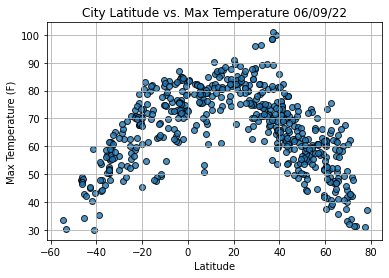

In [19]:
#Import time module.

import time

#Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
                                                               
plt.ylabel("Max Temperature (F)")
                                                               
plt.xlabel("Latitude")
                                                               
plt.grid(True)

#Save the figure
                                                               
plt.savefig("weather_data/Fig1.png")
                                                               
#show plot
                                                               
plt.show()
                                                                                                            

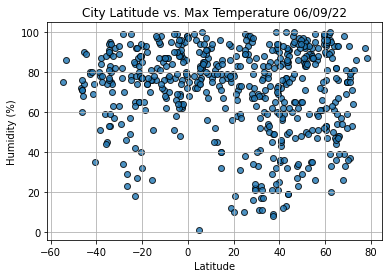

In [20]:
#Build the scatter plot for latitude vs. humidity.

plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
                                                               
plt.ylabel("Humidity (%)")
                                                               
plt.xlabel("Latitude")
                                                               
plt.grid(True)

#Save the figure
                                                               
plt.savefig("weather_data/Fig2.png")
                                                               
#show plot
                                                               
plt.show()

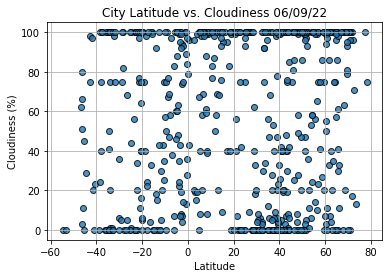

In [21]:
#Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats, cloudiness , edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
                                                               
plt.ylabel("Cloudiness (%)")
                                                               
plt.xlabel("Latitude")
                                                               
plt.grid(True)

#Save the figure
                                                               
plt.savefig("weather_data/Fig3.png")
                                                               
#show plot
                                                               
plt.show()

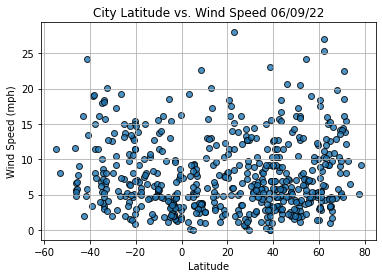

In [22]:
#Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

#Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
                                                               
plt.ylabel("Wind Speed (mph)")
                                                               
plt.xlabel("Latitude")
                                                               
plt.grid(True)

#Save the figure
                                                               
plt.savefig("weather_data/Fig4.png")
                                                               
#show plot
                                                               
plt.show()